# Geoprocessing

In [1]:
import ouroboros as ob
import geopandas as gpd

# large dataset of US National Highway System roads
# https://hepgis-usdot.hub.arcgis.com/datasets/dce9f09392eb474c8ad8e6a78416279b_0
fc1 = ob.FeatureClass("NHS.gdb/National_Highway_System__NHS_")
f"{len(fc1)} rows"

'491781 rows'

In [2]:
# filter by route ID
route = "  I 017"
field_name = "ROUTEID"
column_index = fc1.list_fields().index(field_name)

filtered = list()
for row in fc1:
    if row[column_index] == route:
        filtered.append(row)

fc2 = ob.FeatureClass(gpd.GeoDataFrame(filtered))
f"{len(fc2)} rows where ROUTEID == '{route}'"

"100 rows where ROUTEID == '  I 017'"

,geometry,Index,VERSION,YEAR,STFIPS,CTFIPS,ROUTEID,BEGINPOINT,ENDPOINT,SIGN1,...,AADT,AADT_COM,AADT_SINGL,FUT_AADT,FUT_YEAR,MILES,UPDATE_DAT,NHS_ACTION,FILE_NAME,SHAPE_Length
0,"MULTILINESTRING ((-12480284.708 3968955.531, -...",1699,2025.03.27,2020.0,4.0,13.0,I 017,12.947,13.995,I17,...,202400.0,5465.0,6564.0,210087.0,2039-12-31 00:00:00+00:00,1.048136,NaT,,AZ_NHS_2021,2030.728275


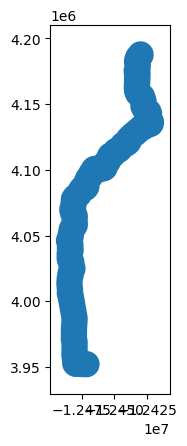

In [3]:
# buffer with GeoPandas
gdf = fc2.to_geodataframe()
gdf = gdf.dissolve()
gdf_buf = gpd.GeoDataFrame(gdf, geometry=gdf.buffer(10000))
gdf_buf.plot()
gdf

In [4]:
# Load results into a new feature class and geodatabase in memory
fc3 = ob.FeatureClass(gdf_buf)
gdb = ob.GeoDatabase()
gdb['NHS_selection_buffered'] = fc3

In [5]:
# Save to disk
gdb.save("NHS_selection.gdb", overwrite=True)
ob.list_datasets("NHS_selection.gdb")

{None: ['NHS_selection_buffered']}